# Prediksi Diabetes

## Import Package

In [23]:
!pip install ucimlrepo

In [84]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.7/99.8 MB 7.7 MB/s eta 0:00:13
    --------------------------------------- 1.5/99.8 MB 10.7 MB/s eta 0:00:10
    --------------------------------------- 2.3/99.8 MB 12.1 MB/s eta 0:00:09
   - -------------------------------------- 3.0/99.8 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 3.4/99.8 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 4.1/99.8 MB 12.6 MB/s eta 0:00:08
   - -------------------------------------- 4.9/99.8 MB 13.2 MB/s eta 0:00:08
   -- ------------------------------------- 5.5/99.8 MB 13.6 MB/s eta 0:00:07
   -- ------------------------------------- 6.3/99.8 MB 13.5 MB/s eta 0:00:07
   -- ------------------------------------- 7.2/99.8 MB 13.9 MB/s eta 0:00:07
   --- ------------------------------------ 7.9/99.8 MB 14.1 MB/s eta 0:00

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rulekit 1.6.4 requires joblib<1.3,>=1.0, but you have joblib 1.3.2 which is incompatible.
rulekit 1.6.4 requires pydantic~=2.0.3, but you have pydantic 2.5.3 which is incompatible.
rulekit 1.6.4 requires requests~=2.25.1, but you have requests 2.31.0 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix




## Import Dataset

In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [26]:
df_features = pd.DataFrame(X)
df_features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [27]:
df_label = pd.DataFrame(y)
df_label

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


## Data Preparation

Tahapan Data Preparation adalah sebagai berikut:
1. Cek informasi kolom
2. Mengatasi missing value
3. Memilih fitur yang akan dilatih
4. Melakukan normalisasi data
5. Melakukan split dataset 80:20 untuk data latih dan data uji

In [61]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [62]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


Berdasarkan informasi diatas, diketahui terdapat 20 kolom fitur dengan tipe data integer dan kolom label dengan tipe data integer pula

In [63]:
# Mengecek deskripsi data
df_features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [49]:
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

Dari data tersebut, dapat dilihat bahwa:
1. terdapat 7 fitur dengan tipe integer, yaitu BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income
2. terdapat 15 fitur dengan tipe binary, yaitu HighBp, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthCare, NoDocbcCost, Diffwalk, dan Sex

### Menangani Missing Value


In [65]:
# Cek apakah terdapat missing value
df_features.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [66]:
df_label.isnull().sum()

Diabetes_binary    0
dtype: int64

Dapat dilihat bahwa dataset ini tidak memiliki missing value sehingga tidak diperlukan pra-pemrosesan untuk menanganinya

### Memilih fitur untuk dilatih

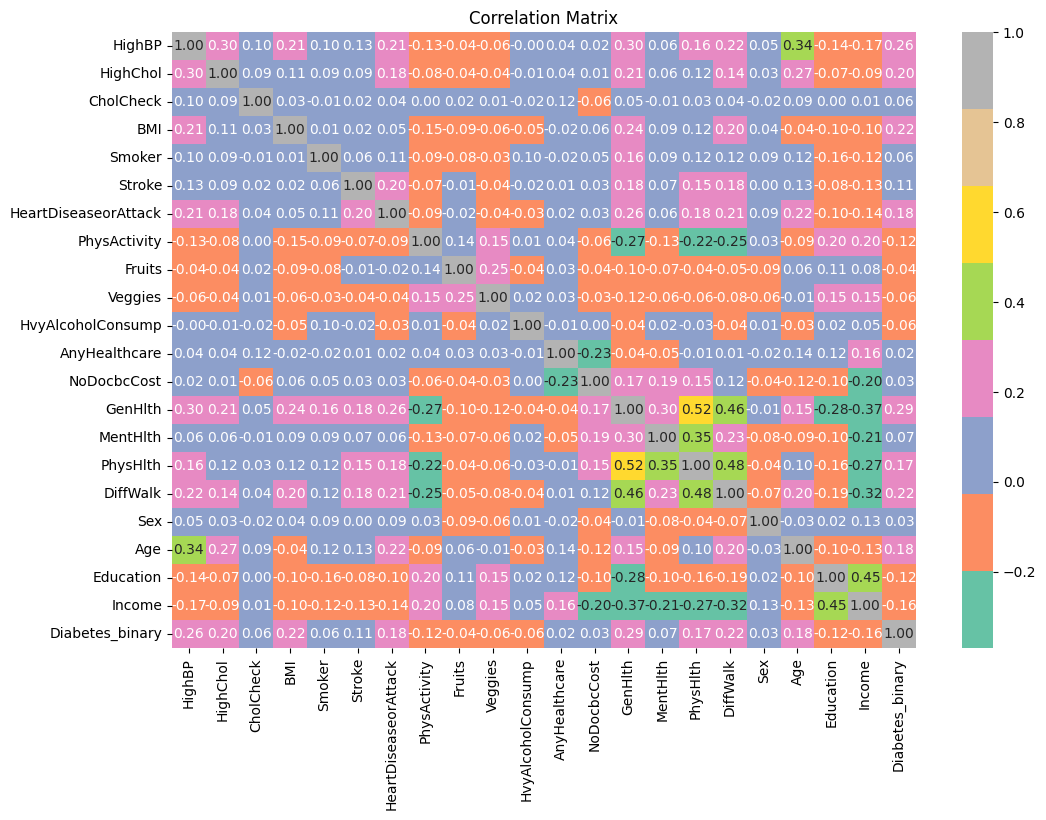

In [67]:
# Confusion Matrix

df = pd.concat([df_features, df_label], axis=1)
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Set2', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Total terdapat 21 fitur, tetapi akan dipilih 15 fitur dengan korelasi tertinggi dengan harapan model menjadi lebih efisien

In [71]:
# Get absolute values of correlations
abs_correlations = corr_matrix['Diabetes_binary'].abs()

# Get the top 15 features with the highest correlations
top_15_features = abs_correlations.sort_values(ascending=False).index[1:16]

print(top_15_features)

Index(['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age',
       'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'Education',
       'PhysActivity', 'Stroke', 'MentHlth', 'CholCheck', 'Smoker'],
      dtype='object')


In [72]:
print(corr_matrix['Diabetes_binary'].abs().sort_values(ascending=False))

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                  0.163919
Education               0.124456
PhysActivity            0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump       0.057056
Veggies                 0.056584
Fruits                  0.040779
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: Diabetes_binary, dtype: float64


In [73]:
df_top_features = df_features[top_15_features]
df_top_features

,GenHlth,HighBP,DiffWalk,BMI,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Income,Education,PhysActivity,Stroke,MentHlth,CholCheck,Smoker
0,5,1,1,40,1,9,0,15,3,4,0,0,18,1,1
1,3,0,0,25,0,7,0,0,1,6,1,0,0,0,1
2,5,1,1,28,1,9,0,30,8,4,0,0,30,1,0
3,2,1,0,27,0,11,0,0,6,3,1,0,0,1,0
4,2,1,0,24,1,11,0,0,4,5,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,3,1,0,45,1,5,0,5,7,6,0,0,0,1,0
253676,4,1,1,18,1,11,0,0,4,2,0,0,0,1,0
253677,1,0,0,28,0,2,0,0,2,5,1,0,0,1,0
253678,3,1,0,23,0,7,0,0,1,5,0,0,0,1,0


### Melakukan Normalisasi Fitur


Normalisasi fitur penting dalam pemrosesan data karena dapat meningkatkan kinerja model machine learning serta membantu dalam konvergensi algoritma pembelajaran. Dengan normalisasi, fitur-fitur dalam dataset diperkecil rentang nilainya ke dalam skala yang seragam, seperti antara 0 dan 1. Hal ini membantu dalam menghindari dominasi fitur dengan rentang nilai yang besar, yang dapat mengakibatkan model menjadi sensitif terhadap skala fitur dan performa yang buruk. Selain itu, normalisasi juga dapat membantu algoritma pembelajaran konvergen lebih cepat karena memperbaiki kondisi numerik dari data, seperti meningkatkan numerik kestabilan dan mengurangi kesalahan pembelajaran. Dengan demikian, normalisasi fitur merupakan langkah penting dalam persiapan data sebelum melatih model machine learning.

In [74]:
# Ambil kolom dengan nilai numerik selain binary

num_col =  ['GenHlth', 'BMI', 'Age','PhysHlth', 'Income', 'Education', 'MentHlth']

scaler = MinMaxScaler(feature_range=(0, 1))
df_top_features[num_col] = scaler.fit_transform(df_top_features[num_col])

C:\Users\Sayyidan\AppData\Local\Temp\ipykernel_21532\3517677585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features[num_col] = scaler.fit_transform(df_top_features[num_col])


In [75]:
df_top_features.head()

,GenHlth,HighBP,DiffWalk,BMI,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Income,Education,PhysActivity,Stroke,MentHlth,CholCheck,Smoker
0,1.00,1,1,0.325581,1,0.666667,0,0.5,0.285714,0.6,0,0,0.6,1,1
1,0.50,0,0,0.151163,0,0.500000,0,0.0,0.000000,1.0,1,0,0.0,0,1
2,1.00,1,1,0.186047,1,0.666667,0,1.0,1.000000,0.6,0,0,1.0,1,0
3,0.25,1,0,0.174419,0,0.833333,0,0.0,0.714286,0.4,1,0,0.0,1,0
4,0.25,1,0,0.139535,1,0.833333,0,0.0,0.428571,0.8,1,0,0.1,1,0


### Split Dataset
Pembagian data menjadi set pelatihan (training) dan validasi adalah praktik umum dalam pengembangan model machine learning. Data training digunakan untuk melatih model, sementara data validasi digunakan untuk mengevaluasi kinerja model di luar sampel data pelatihan. Proses ini penting untuk mengukur seberapa baik model akan berkinerja pada data baru yang belum pernah dilihat sebelumnya. Dengan memisahkan data menjadi kedua set ini, kita dapat memvalidasi keakuratan dan kemampuan generalisasi model secara objektif. Validasi juga membantu dalam mengidentifikasi apakah model cenderung overfitting (terlalu cocok dengan data pelatihan) atau underfitting (tidak cukup cocok dengan data pelatihan). Dengan demikian, pemisahan data menjadi set pelatihan dan validasi adalah langkah kritis dalam pengembangan model machine learning yang stabil dan berkinerja tinggi.

In [76]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(df_top_features, df_label, test_size=0.2, random_state=42)

In [77]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'train labels: {len(y_train)}')
print(f'validation labels: {len(y_test)}')

train samples: 202944
validation samples: 50736
train labels: 202944
validation labels: 50736


# Modelling

Model machine learning yang akan dibandingkan adalah Decision Tree, Random Forest, dan XGBoost

### Decision Tree
Decision tree adalah salah satu metode dalam machine learning yang digunakan untuk melakukan pemodelan prediktif dan mengambil keputusan berdasarkan serangkaian aturan yang dihasilkan dari data latih. Pada dasarnya, decision tree menggambarkan struktur pohon di mana setiap simpul internal mewakili keputusan berdasarkan fitur-fitur data, sedangkan cabang-cabangnya merepresentasikan hasil dari keputusan tersebut. Proses pembuatan decision tree melibatkan pemilihan fitur yang paling informatif untuk membagi data secara rekursif sehingga setiap cabang dari pohon meminimalkan ketidakmurnian (misclassification). Keuntungan utama dari decision tree adalah kemampuannya untuk menghasilkan aturan yang mudah diinterpretasi, karena representasi visualnya yang mirip dengan alur pemikiran manusia. Namun, decision tree cenderung rentan terhadap overfitting jika tidak diatur dengan baik, dan untuk meningkatkan kinerja dan mengatasi masalah tersebut, metode seperti pruning dan ensemble learning sering digunakan.

accuracy_train: 0.8660320088300221 
accuracy_val: 0.8659137496058026 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43739
           1       0.57      0.11      0.19      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.55      0.56     50736
weighted avg       0.83      0.87      0.83     50736



<Axes: >

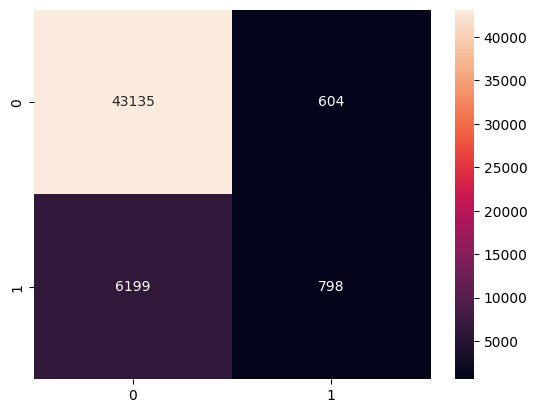

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix



dt = DecisionTreeClassifier(max_depth=8, min_samples_split=20)

dt.fit(X_train, y_train)
predictions_train = dt.predict(X_train)
predictions_val = dt.predict(X_test)
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_test)

print(f"accuracy_train: {accuracy_train} ")
print(f"accuracy_val: {accuracy_val} ")

print('\nClassification Report:')
print(classification_report(y_test,predictions_val))

sns.heatmap(confusion_matrix(y_test,predictions_val),fmt='',annot=True)


### Random Forest
Random forest adalah metode ensemble learning yang menggunakan banyak pohon keputusan yang dibangun secara acak dari sampel data latih. Setiap pohon menghasilkan prediksi, dan prediksi akhir diambil berdasarkan mayoritas suara atau rata-rata. Keunggulan random forest termasuk kemampuannya mengatasi overfitting dan menangani data tidak seimbang. Metode ini cocok untuk berbagai masalah prediksi dan sering dipilih karena kinerja yang stabil dan akurat.

C:\Users\Sayyidan\AppData\Local\Temp\ipykernel_21532\1321904297.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


accuracy_train: 0.8655294071270893 
accuracy_val: 0.8657363607694734 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43739
           1       0.60      0.08      0.14      6997

    accuracy                           0.87     50736
   macro avg       0.74      0.53      0.53     50736
weighted avg       0.83      0.87      0.82     50736



<Axes: >

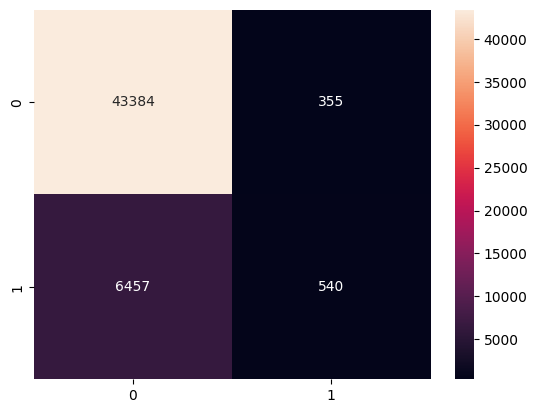

In [102]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(max_depth=8, min_samples_split=20)

rf.fit(X_train, y_train)
predictions_train = rf.predict(X_train)
predictions_val = rf.predict(X_test)
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_test)

print(f"accuracy_train: {accuracy_train} ")
print(f"accuracy_val: {accuracy_val} ")
print('\nClassification Report:')
print(classification_report(y_test,predictions_val))

sns.heatmap(confusion_matrix(y_test,predictions_val),fmt='',annot=True)


### XGBoost
XGBoost adalah algoritma machine learning yang sangat efektif dalam mengatasi berbagai jenis masalah prediksi, seperti klasifikasi dan regresi. Dengan menggunakan teknik ensemble boosting, XGBoost menggabungkan prediksi dari beberapa model lemah untuk membentuk model yang kuat. Keunggulannya termasuk kecepatan pelatihan yang tinggi, kemampuan menangani data tidak seimbang, dan penanganan fitur yang kuat.

accuracy_train: 0.8745565279091769 
accuracy_val: 0.8656181015452539 

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.54      0.16      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



<Axes: >

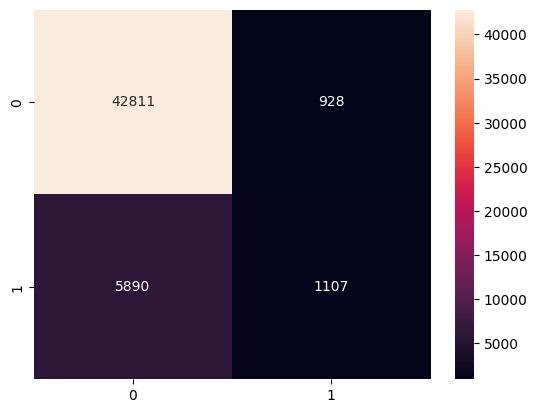

In [103]:
from xgboost import XGBClassifier

xgb = XGBClassifier(alpha=2)

xgb.fit(X_train, y_train)
predictions_train = xgb.predict(X_train)
predictions_val = xgb.predict(X_test)
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_test)

print(f"accuracy_train: {accuracy_train} ")
print(f"accuracy_val: {accuracy_val} ")


print('\nClassification Report:')
print(classification_report(y_test,predictions_val))

sns.heatmap(confusion_matrix(y_test,predictions_val),fmt='',annot=True)


In [108]:
#MSE
acc = pd.DataFrame(columns=['train', 'test'], index=['Decision Tree','Random Forest', 'XGBoost'])
mse = pd.DataFrame(columns=['train', 'test'], index=['Decision Tree','Random Forest', 'XGBoost'])
dict_model = {'Decision Tree': dt, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in dict_model.items():
    acc.loc[name, 'train'] = accuracy_score(y_train, model.predict(X_train))
    acc.loc[name, 'test'] = accuracy_score(y_test, model.predict(X_test))
    
for name, model in dict_model.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3


In [109]:
acc

,train,test
Decision Tree,0.866032,0.865914
Random Forest,0.865529,0.865736
XGBoost,0.874557,0.865618


In [110]:
mse

,train,test
Decision Tree,0.000134,0.000134
Random Forest,0.000134,0.000134
XGBoost,0.000125,0.000134


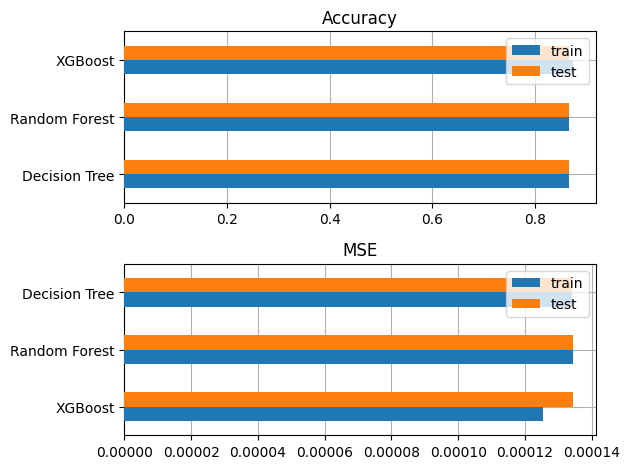

In [113]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1)

# Plot Accuracy
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=axs[0], zorder=3)
axs[0].grid(zorder=0)
axs[0].set_title('Accuracy')

# Plot MSE
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=axs[1], zorder=3)
axs[1].grid(zorder=0)
axs[1].set_title('MSE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Hasil
Pada data validasi, ketiga model (decision tree, random forest, dan XGBoost) menunjukkan performa yang nyaris sama berdasarkan akurasi dan Mean Squared Error (MSE). Hal ini menunjukkan bahwa ketiga model memiliki kemampuan yang serupa dalam melakukan prediksi terhadap data baru yang belum pernah dilihat sebelumnya. Meskipun ketiga model menggunakan pendekatan yang berbeda dalam pembuatan prediksi (seperti single tree vs ensemble learning), namun hasil validasi menunjukkan bahwa mereka memberikan hasil yang sebanding dalam hal akurasi dan kesalahan prediksi. Keputusan ini dapat memberikan kepercayaan bahwa ketiga model tersebut dapat digunakan secara setara dalam aplikasi praktis, dengan mempertimbangkan faktor-faktor lain seperti kompleksitas model dan kebutuhan komputasi.